PROBLEM STATEMENT:
Build CNN Model for Classification Of Flowers


Mounting drive

In [1]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA AUGMENTATION

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,validation_split=0.2)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'training')

Found 3457 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'validation')

Found 860 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

CNN MODEL( Adding  Layers :Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)


In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [29]:
#hidden layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(5,activation='softmax'))#op layer

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

FIT THE MODEL

In [18]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
35/35 [==============================] - 2201s 63s/step - loss: 1.5348 - accuracy: 0.3555 - val_loss: 1.2523 - val_accuracy: 0.4733
Epoch 2/10
35/35 [==============================] - 18s 515ms/step - loss: 1.1627 - accuracy: 0.5189 - val_loss: 1.3043 - val_accuracy: 0.4721
Epoch 3/10
35/35 [==============================] - 18s 526ms/step - loss: 1.0715 - accuracy: 0.5722 - val_loss: 1.2312 - val_accuracy: 0.5221
Epoch 4/10
35/35 [==============================] - 19s 548ms/step - loss: 1.0133 - accuracy: 0.5962 - val_loss: 1.1853 - val_accuracy: 0.5163
Epoch 5/10
35/35 [==============================] - 18s 511ms/step - loss: 0.9701 - accuracy: 0.6240 - val_loss: 1.1690 - val_accuracy: 0.5314
Epoch 6/10
35/35 [==============================] - 18s 517ms/step - loss: 0.9247 - accuracy: 0.6370 - val_loss: 1.1683 - val_accuracy: 0.5488
Epoch 7/10
35/35 [==============================] - 18s 514ms/step - loss: 0.9126 - accuracy: 0.6477 - val_loss: 1.0549 - val_accuracy: 0.6023

SAVING THE MODEL

In [19]:
model.save('flowers.h5')


TESTING THE MODEL

In [20]:

import numpy as np
from tensorflow.keras.preprocessing import image

In [21]:
img = image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/daisy/10172636503_21bededa75_n.jpg' ,target_size=(64,64)) 

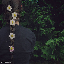

In [22]:
img

In [23]:
x=image.img_to_array(img)

In [24]:
x

array([[[ 23.,  29.,  25.],
        [ 19.,  20.,  25.],
        [ 43.,  38.,  42.],
        ...,
        [ 20.,  12.,  23.],
        [ 20.,  17.,  24.],
        [ 21.,  15.,  25.]],

       [[ 25.,  31.,  27.],
        [ 22.,  24.,  23.],
        [ 52.,  48.,  49.],
        ...,
        [ 22.,  14.,  25.],
        [ 20.,  15.,  22.],
        [ 22.,  14.,  25.]],

       [[ 16.,  15.,  21.],
        [ 24.,  30.,  28.],
        [ 45.,  45.,  47.],
        ...,
        [ 20.,  12.,  23.],
        [ 20.,  19.,  27.],
        [ 23.,  15.,  26.]],

       ...,

       [[ 22.,  19.,  28.],
        [ 16.,  15.,  20.],
        [  9.,   6.,  13.],
        ...,
        [ 28.,  38.,  30.],
        [ 31.,  34.,  25.],
        [ 28.,  30.,  25.]],

       [[ 23.,  13.,  24.],
        [181., 181., 181.],
        [ 28.,  26.,  29.],
        ...,
        [ 27.,  28.,  23.],
        [ 26.,  43.,  33.],
        [ 34.,  48.,  33.]],

       [[ 21.,  18.,  27.],
        [ 25.,  22.,  31.],
        [ 26.,  

In [25]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 23.,  29.,  25.],
         [ 19.,  20.,  25.],
         [ 43.,  38.,  42.],
         ...,
         [ 20.,  12.,  23.],
         [ 20.,  17.,  24.],
         [ 21.,  15.,  25.]],

        [[ 25.,  31.,  27.],
         [ 22.,  24.,  23.],
         [ 52.,  48.,  49.],
         ...,
         [ 22.,  14.,  25.],
         [ 20.,  15.,  22.],
         [ 22.,  14.,  25.]],

        [[ 16.,  15.,  21.],
         [ 24.,  30.,  28.],
         [ 45.,  45.,  47.],
         ...,
         [ 20.,  12.,  23.],
         [ 20.,  19.,  27.],
         [ 23.,  15.,  26.]],

        ...,

        [[ 22.,  19.,  28.],
         [ 16.,  15.,  20.],
         [  9.,   6.,  13.],
         ...,
         [ 28.,  38.,  30.],
         [ 31.,  34.,  25.],
         [ 28.,  30.,  25.]],

        [[ 23.,  13.,  24.],
         [181., 181., 181.],
         [ 28.,  26.,  29.],
         ...,
         [ 27.,  28.,  23.],
         [ 26.,  43.,  33.],
         [ 34.,  48.,  33.]],

        [[ 21.,  18.,  27.],
       

In [26]:
model.predict(x)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [31]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'rose'

In [32]:
img = image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/sunflower/10386702973_e74a34c806_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'rose'